In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
import warnings


In [3]:
warnings.filterwarnings('ignore')
trained_model = load_model('models/img_model.trained.weights.hdf5')
img_width = 300
img_height = 300
IMAGE_SHAPE = (img_width, img_height)

In [4]:
CLASSES = ['Bevel-gear',
 'bearing',
 'clutch',
 'cylincer',
 'filter',
 'fuel-tank',
 'helical_gear',
 'piston',
 'rack-pinion',
 'shocker',
 'spark-plug',
 'spur-gear',
 'valve',
 'wheel']

In [15]:
def predict_img(full_img_path):
    img = image.load_img(full_img_path, target_size=(300, 300))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img)/255.0

    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    p = trained_model.predict(img[np.newaxis,...])
    print('Confidence: ',str(round(np.max(p[0])*100, 2))+'%')
    print('Class: ',CLASSES[np.argmax(p[0])])
    return {
        'confidence': str(round(np.max(p[0])*100, 2))+'%',
        'class': CLASSES[np.argmax(p[0])]
    }

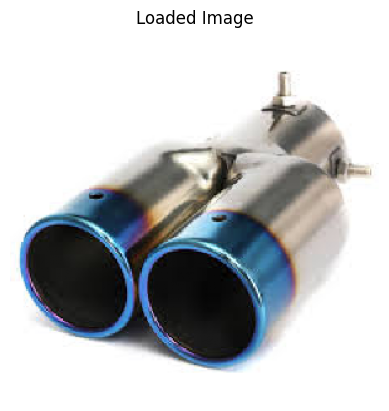

1/1 [==============================] - 0s 185ms/step
Confidence:  87.04%
Class:  cylincer


In [7]:
predict_img(r'dataset\Automobile-parts\cylincer\image (1).jpg')

In [8]:
import os

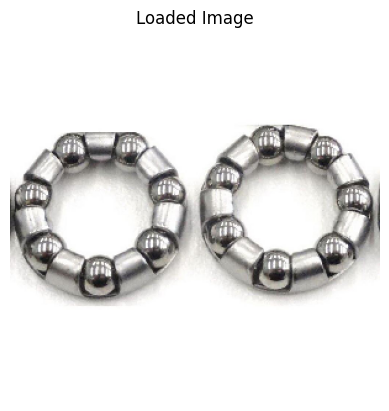

1/1 [==============================] - 0s 238ms/step
Confidence:  83.79%
Class:  bearing
---------------------------


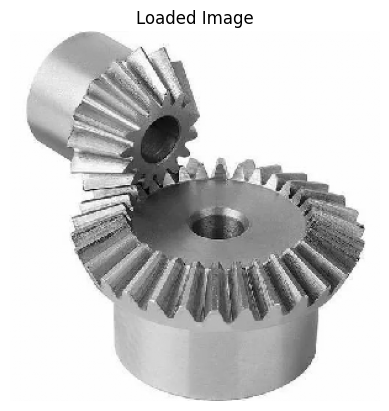

1/1 [==============================] - 0s 169ms/step
Confidence:  77.55%
Class:  Bevel-gear
---------------------------


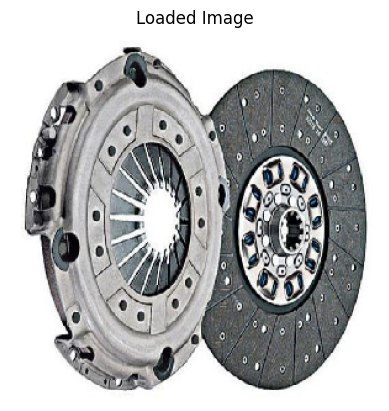

1/1 [==============================] - 0s 178ms/step
Confidence:  99.45%
Class:  clutch
---------------------------


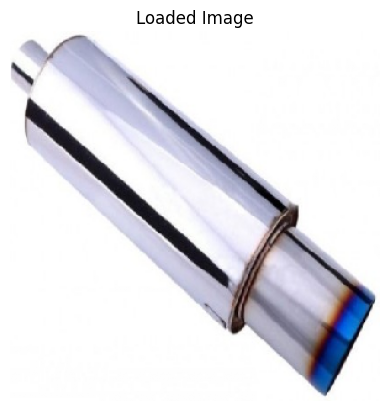

1/1 [==============================] - 0s 153ms/step
Confidence:  99.05%
Class:  cylincer
---------------------------


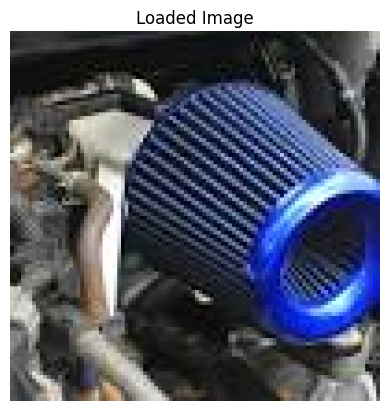

1/1 [==============================] - 0s 169ms/step
Confidence:  97.75%
Class:  filter
---------------------------


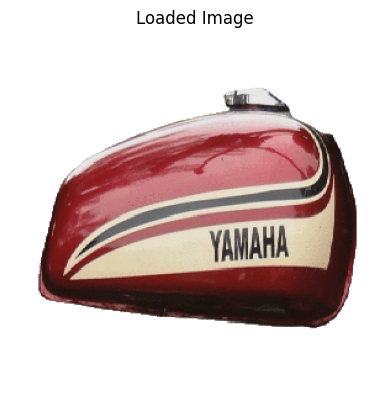

1/1 [==============================] - 0s 211ms/step
Confidence:  98.29%
Class:  fuel-tank
---------------------------


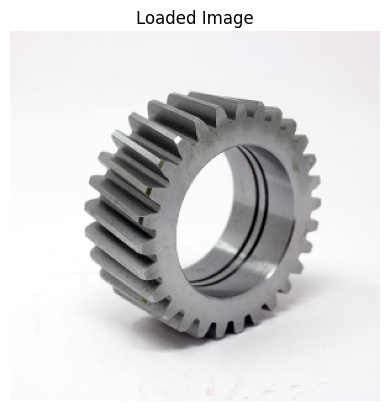

1/1 [==============================] - 0s 158ms/step
Confidence:  84.32%
Class:  spur-gear
---------------------------


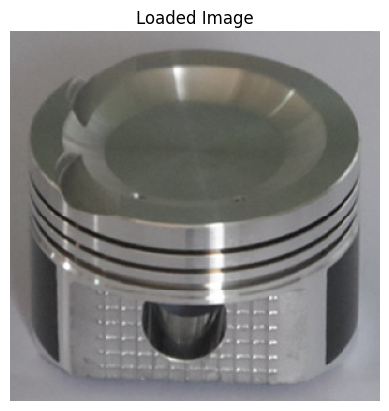

1/1 [==============================] - 0s 170ms/step
Confidence:  75.66%
Class:  piston
---------------------------


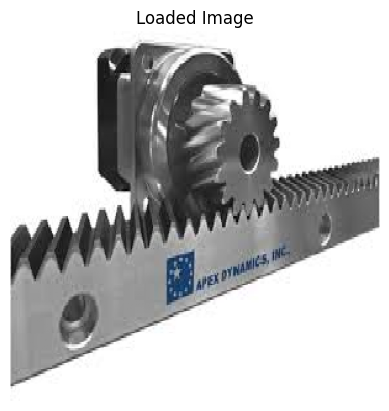

1/1 [==============================] - 0s 159ms/step
Confidence:  98.89%
Class:  rack-pinion
---------------------------


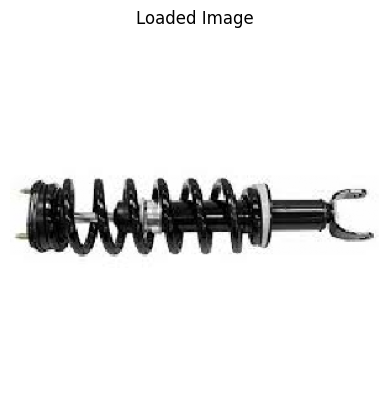

1/1 [==============================] - 0s 164ms/step
Confidence:  93.72%
Class:  shocker
---------------------------


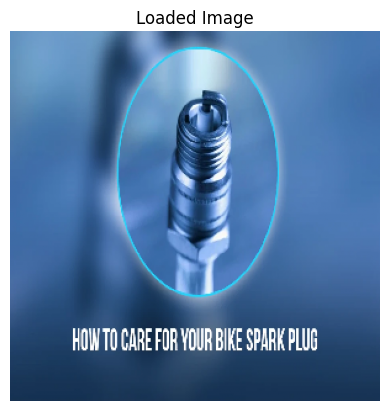

1/1 [==============================] - 0s 159ms/step
Confidence:  67.25%
Class:  spark-plug
---------------------------


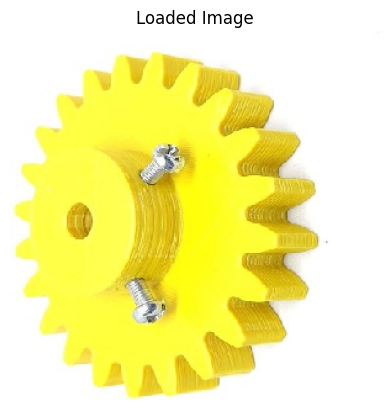

1/1 [==============================] - 0s 164ms/step
Confidence:  47.54%
Class:  spur-gear
---------------------------


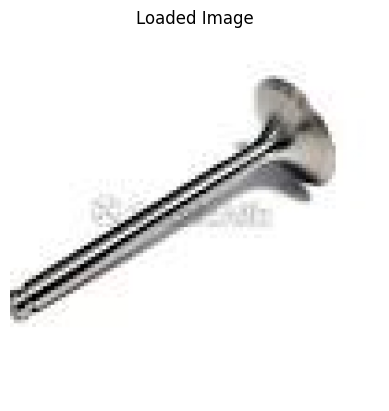

1/1 [==============================] - 0s 149ms/step
Confidence:  98.83%
Class:  valve
---------------------------


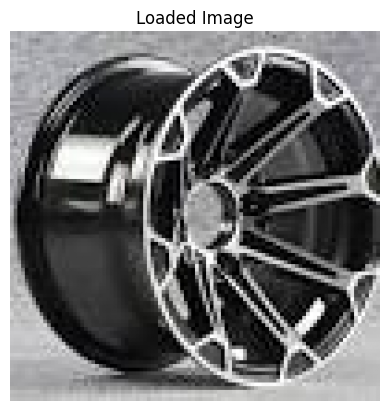

1/1 [==============================] - 0s 168ms/step
Confidence:  83.03%
Class:  wheel
---------------------------


In [16]:
results = []
for root, folders, files in os.walk('dataset/Automobile-parts'):
    # get only first image from each folder
    for folder in folders:
        image_path = os.path.join(root, folder, os.listdir(os.path.join(root, folder))[0])
        ans = predict_img(image_path)
        results.append({
            'folder': folder,
            'confidence': ans['confidence'],
            'class': ans['class']
        })
        print('---------------------------')

In [17]:
import pandas as pd

In [18]:
pd.DataFrame(results)

,folder,confidence,class
0,bearing,83.79%,bearing
1,Bevel-gear,77.55%,Bevel-gear
2,clutch,99.45%,clutch
3,cylincer,99.05%,cylincer
4,filter,97.75%,filter
5,fuel-tank,98.29%,fuel-tank
6,helical_gear,84.32%,spur-gear
7,piston,75.66%,piston
8,rack-pinion,98.89%,rack-pinion
9,shocker,93.72%,shocker
